In [16]:
import kagglehub
from PIL import Image
import tensorflow as tf
from tensorflow.keras import layers


import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from PIL import Image
import glob
import random
import pandas as pd

In [3]:
path = kagglehub.dataset_download("thedatasith/hotdog-nothotdog")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\jason\.cache\kagglehub\datasets\thedatasith\hotdog-nothotdog\versions\3


In [4]:
img = Image.open(r"./hotdog-nothotdog/train/hotdog/5.jpg")

(np.float64(-0.5), np.float64(298.5), np.float64(298.5), np.float64(-0.5))

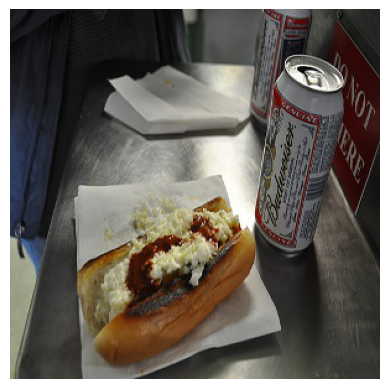

In [5]:
plt.imshow(img)
plt.axis("off")

In [6]:
files=glob.glob(r"./hotdog-nothotdog/train/hotdog/*.jpg")
TrainData = []
index = 0

for file in files:
    img = Image.open(file)
    img = img.resize((128, 128))
    imgarray = np.asarray(img)
    TrainData.append((imgarray,1))

files=glob.glob(r"./hotdog-nothotdog/train/nothotdog/*.jpg")
index = 0
for file in files:
    img = Image.open(file)
    img = img.resize((128, 128))
    imgarray = np.asarray(img)
    TrainData.append((imgarray,0))

print("Done.")

random.shuffle(TrainData)

Done.


In [7]:
files=glob.glob(r"./hotdog-nothotdog/test/hotdog/*.jpg")

TestData = []
index = 0

for file in files:
    img = Image.open(file)
    img = img.resize((128, 128))
    imgarray = np.asarray(img)
    TestData.append((imgarray,1))

files=glob.glob(r"./hotdog-nothotdog/test/nothotdog/*.jpg")
index = 0
for file in files:
    img = Image.open(file)
    img = img.resize((128, 128))
    imgarray = np.asarray(img)
    TestData.append((imgarray,0))

print("Done.")

random.shuffle(TestData)

Done.


In [8]:
print("TrainData ",len(TrainData))
print("TestData ",len(TestData))

TrainData  4242
TestData  400


In [9]:
Train_X = np.array([item[0] for item in TrainData])
Train_Y = np.array([item[1] for item in TrainData])

Test_X = np.array([item[0] for item in TestData])
Test_Y = np.array([item[1] for item in TestData])

Train_X = Train_X.astype('float32')
Test_X = Test_X.astype('float32')

Train_X /= 255
Test_X /= 255

In [ ]:
BATCH_SIZE = 32
IMG_SIZE = 128

base = tf.keras.applications.MobileNetV2(
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False,
    weights="imagenet"
)

base.trainable = False  # start frozen

inputs = tf.keras.Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = tf.keras.applications.mobilenet_v2.preprocess_input(inputs)
x = base(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.fit(Train_X, Train_Y, epochs = 50, batch_size = 100)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 17s 256ms/step - accuracy: 0.5009 - loss: 0.7611
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 278ms/step - accuracy: 0.4941 - loss: 0.7560
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 247ms/step - accuracy: 0.4896 - loss: 0.7504
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.4939 - loss: 0.7576
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 240ms/step - accuracy: 0.5017 - loss: 0.7438
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 268ms/step - accuracy: 0.4856 - loss: 0.7503
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 271ms/step - accuracy: 0.5149 - loss: 0.7333
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 250ms/step - accuracy: 0.5021 - loss: 0.7374
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 243ms/step - accuracy: 0.5068 - loss: 0.7327
Epoch 10/50
 4/43 ━━━━━━━━━━━━━━━━━━━━ 9s 245ms/step - accuracy: 0.5500 - loss: 0.7024 

In [11]:
model.evaluate(Test_X,Test_Y)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7150 - loss: 0.6809 


[0.6809423565864563, 0.7149999737739563]

In [12]:
Predictions = model.predict(Test_X)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step 


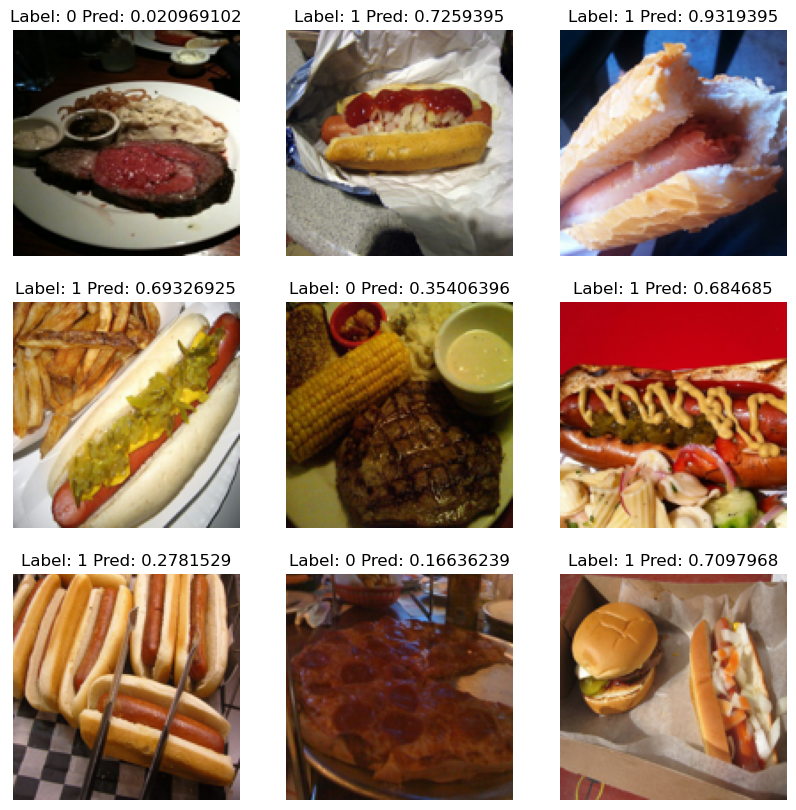

In [13]:
plt.figure(figsize=(10, 10))
a = 100
for i in range(0,9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(Test_X[i+a])
    plt.title("Label: "+str(Test_Y[i+a])+" Pred: "+str(Predictions[i+a][0]))
    plt.axis("off")

In [14]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


NameError: name 'train_ds' is not defined

In [ ]:
test_loss, test_accuracy = model.evaluate(test_ds)

print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


In [ ]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)
